<h3> Desarrollo Experimental 2
<h3>Tarea 4
    
<h3> Fidel Alejandro Navarro Salazar

En este código se implementará una simulación de Monte Carlo para el cálculo de las propiedades estructurales y termodinámicas de sistemas con modelos de interacción de potencial continuo. Con unidades reducidas $SIGMA-BETA$.

Para la simulación se consideró una fracción de volumen de $4.4*10^{-4}$

El potencial a utilizar será el Potencial DLVO (Yukawa)

<h3> $\beta u(r) = K e^{-\kappa r} \frac{1}{r}$ 

Donde $K=580$ y $\kappa = 0.149$

En la bibliografía se puede encontrar escrito el potencial como:

<h3> $\beta u(r) = K e^{-z(r-1)} \frac{1}{r}$

In [1]:
import random as rd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from IPython.display import Image
import random as rd
#la función se encuentra en un documento por separado, 
#permite calcular la configuración inicial y la longitud de la caja
#la energía de la configuración inicial para 2D y 3D,
#y el calculo de las configuraciones en 2D y 3D
from config_T4 import caja, L_bi, sumup3d, movimiento3d, gdr, pote
#from numba import njit

In [2]:
#Establecemos los valores con los cuales trabajaremos

N = 1000       #Número de partículas
n = 6*4.4e-4 / np.pi         #Densidad
dim = 3         #La dimension con la cual trabajaremos (muchas funciones estan generalizadas)
nStep = 15000    #Número de configuraciones
#--------------------------------------------------------------------------------------------
seed = 652      #Semilla a utilizar en el cálculo de valores aleatorios
rd.seed(seed)   #Le damos la semilla al generador de números aleatorios
nFrec = 100     #Frecuencia con la que se guardarán los datos
nener = 5000    #Iteración donde se alcanza el equilibrio termodinámico
iPrint = 1000   #Cada cuantos pasos escribira en pantalla los resultados
iRatio = 100    #Frecuencia de corección de paso
cc = 0.5        #Criterio de corrección
#--------------------------------------------------------------------------------------------
L = L_bi(n,N,dim)  #LLamamos a la función que nos calcularála longitud de la celda
rCut = L/2.        #Radio de corte
drMax = 0.1        #Longitud de paso
#--------------------------------------------------------------------------------------------
#Por medio de la función "caja" obtenemos las posiciones de la configuración inicial
v = caja(seed,n,N,dim)    #arrays de valores
x = v[:,0].copy()
y = v[:,1].copy()
z = v[:,2].copy()
inicial = pd.DataFrame(v , columns={"x","y", "z"})   #dataFrame de los mismos
#Calculamos la energía de la configuración inicial
V= sumup3d(N,L,rCut, x, y, z)
Vlrc = 0. #No hay corrección de largo alcance (potencial de corto alcance)
Vi = V + Vlrc
print ("Energía de la configuración inicial",Vi)

#Seleccionamos una partícula trazadora
iTraza = int(rd.uniform(0,N))
if iTraza==N:
    iTraza = N-1
print ("La partícula trazadora es:", iTraza)

Energía de la configuración inicial 139877.9307801267
La partícula trazadora es: 143


In [3]:
xfin, yfin, zfin, xTraza, yTraza, zTraza, vTraza, Cx, Cy, Cz, ki2 = movimiento3d(x, y, z, N, nStep, L, rCut, drMax, iRatio, iPrint, cc, V, iTraza, Vi, nener)

0 0.00716 0.095 279.1944795946468 

1000 0.93102 0.154744989543857 235.40750175494188 

2000 0.8927 0.2520632819887201 234.8218225002764 

3000 0.82522 0.41058452563931336 234.85150745272816 

4000 0.72374 0.6687989276518426 234.83215199621958 

5000 0.56285 1.0894029796466018 234.85520045807615 

6000 0.49033 1.1891010821944572 234.93202079485434 

7000 0.49302 1.17431145191975 234.80922008861722 

8000 0.50241 1.2817800615563744 234.8076555118879 

9000 0.5056 1.265837722012855 234.82287411678124 

10000 0.5083 1.2500936678052859 234.8736581965575 

11000 0.51374 1.234545432728859 234.8204957070906 

12000 0.5199 1.2191905812525716 234.84293442994854 

13000 0.48416 1.2040267081377185 234.86569334635337 

14000 0.48722 1.1890514380611263 234.85302854092657 



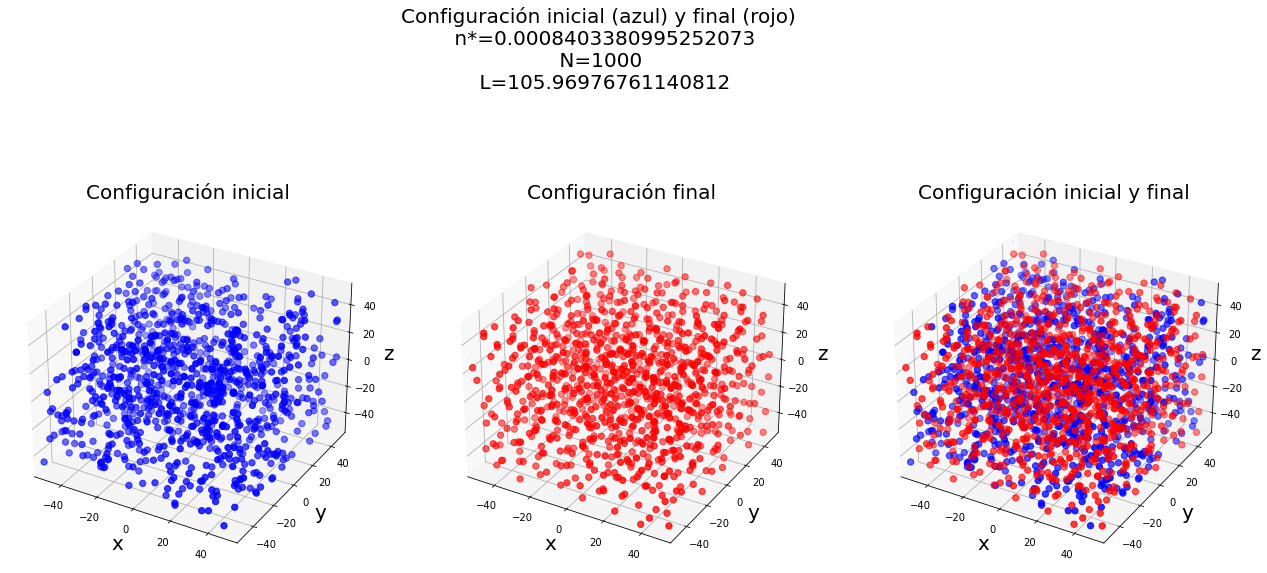

In [18]:
fig = plt.figure()
fig.set_size_inches(22,11)
fig.suptitle("Configuración inicial (azul) y final (rojo) \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)

ax1 = fig.add_subplot(1,3,1, projection="3d")
ax1.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")

ax1.set_title("Configuración inicial", size=20)
ax1.set_ylabel("y", size=20)
ax1.set_xlabel("x", size=20)
ax1.set_zlabel("z", size=20)
ax1.set_xlim(-L/2.,L/2.)
ax1.set_ylim(-L/2.,L/2.)  
ax1.set_zlim(-L/2.,L/2.)

ax2 = fig.add_subplot(1,3,2, projection="3d")
ax2.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax2.set_title("Configuración final", size=20)
ax2.set_ylabel("y", size=20)
ax2.set_xlabel("x", size=20)
ax2.set_zlabel("z", size=20)
ax2.set_xlim(-L/2.,L/2.)
ax2.set_ylim(-L/2.,L/2.)  
ax2.set_zlim(-L/2.,L/2.)

ax3 = fig.add_subplot(1,3,3, projection="3d")
ax3.scatter(inicial["x"],inicial["y"],inicial["z"],"o", s=40,c="blue")
ax3.scatter(xfin,yfin,zfin,"o", c="r", s=40)

ax3.set_title("Configuración inicial y final", size=20)
ax3.set_ylabel("y", size=20)
ax3.set_xlabel("x", size=20)
ax3.set_zlabel("z", size=20)
ax3.set_xlim(-L/2.,L/2.)
ax3.set_ylim(-L/2.,L/2.)  
ax3.set_zlim(-L/2.,L/2.)

fig.savefig('configuraciones_1000', dpi=fig.dpi, facecolor="white")

plt.show()

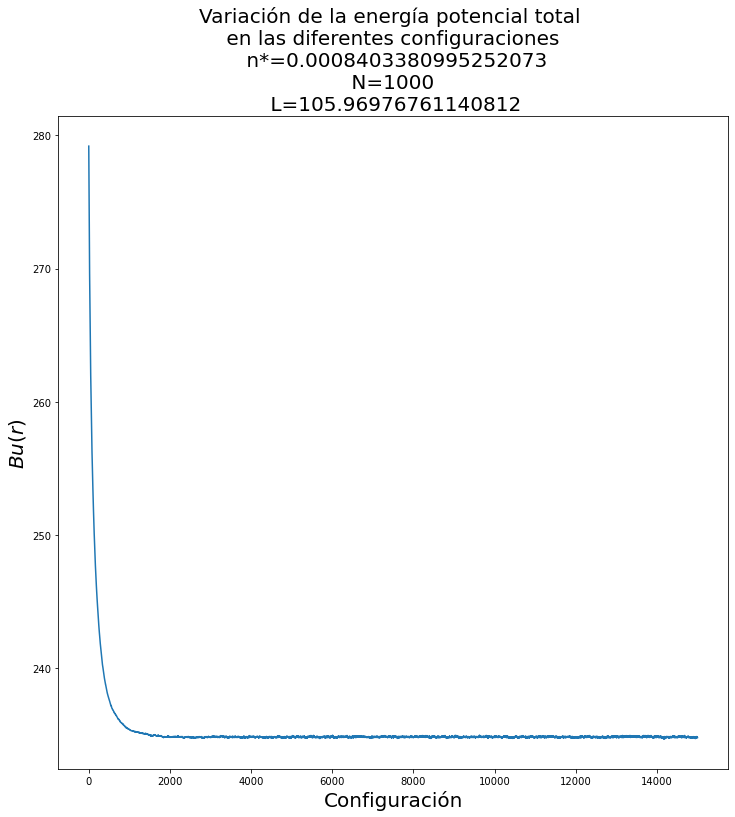

In [3]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

vT = pd.read_csv("vTraza_1000.csv", header=None)

ax.plot(np.linspace(0,nStep,nStep), vT)
#ax.plot(np.linspace([0,nStep], [vTraza.mean(), vTraza.mean()])
    
ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("$B u(r)$", size=20)
ax.set_xlabel("Configuración", size=20)
#ax.set_ylim(vTraza.min(), vTraza.max()) 
#ax.set_ylim(234,236)
fig.savefig('T4_Confi_Energia_1000', dpi=fig.dpi, facecolor="white")

plt.show()

#np.savetxt('vTraza_1000.csv', vTraza, delimiter=',')

In [4]:
vT2 = vT.iloc[5000:]
PromV = vT2.mean()[0]
print("El promedio de la energía potencial es ", PromV)

El promedio de la energía potencial es  234.84839779451144


In [ ]:
rt, gdr = gdr(Cx, Cy, Cz, rCut, L, nStep, n, N, ki2)

np.savetxt('rt_1000.csv', rt, delimiter=',')
np.savetxt('gdr_1000.csv', gdr, delimiter=',')

In [5]:
G = pd.read_csv("gdr_1000.csv", header=None)
R = pd.read_csv("rt_1000.csv", header=None)

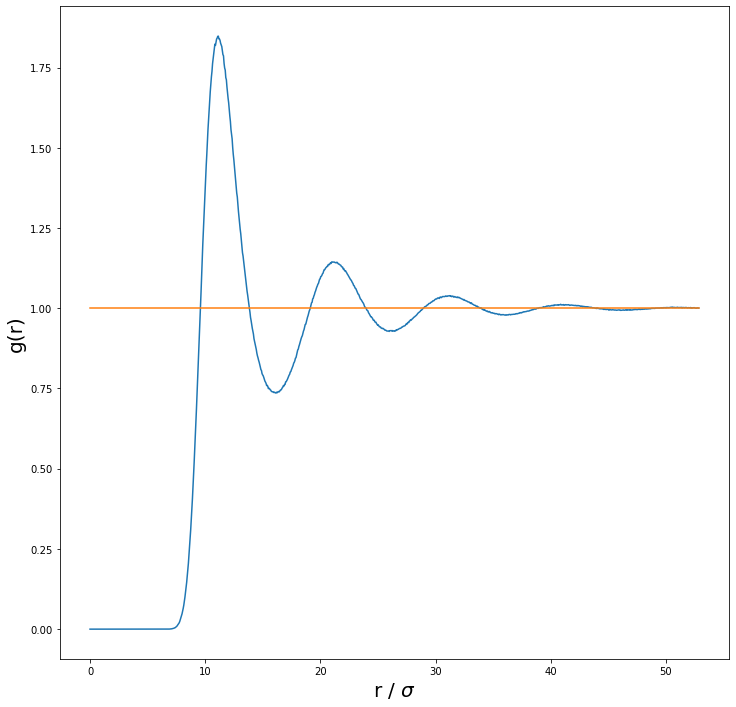

In [6]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(R, G)
ax.plot([R.min(), R.max()],[1,1])

ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_xlim(30, 50) 
#ax.set_ylim(0.97, 1.04)

fig.savefig('T4_GDR_1000', dpi=fig.dpi, facecolor="white")

plt.show()

<h3>Bibliografía

https://www.researchgate.net/publication/10855997_Self-consistent_theory_of_collective_Brownian_dynamics_Theory_versus_simulation

Comparando los resultados de la función de la distribución radial con el potencial de Yukawa repulsivo de Gaylor et al. con $K=556$, $\kappa = 0.149$

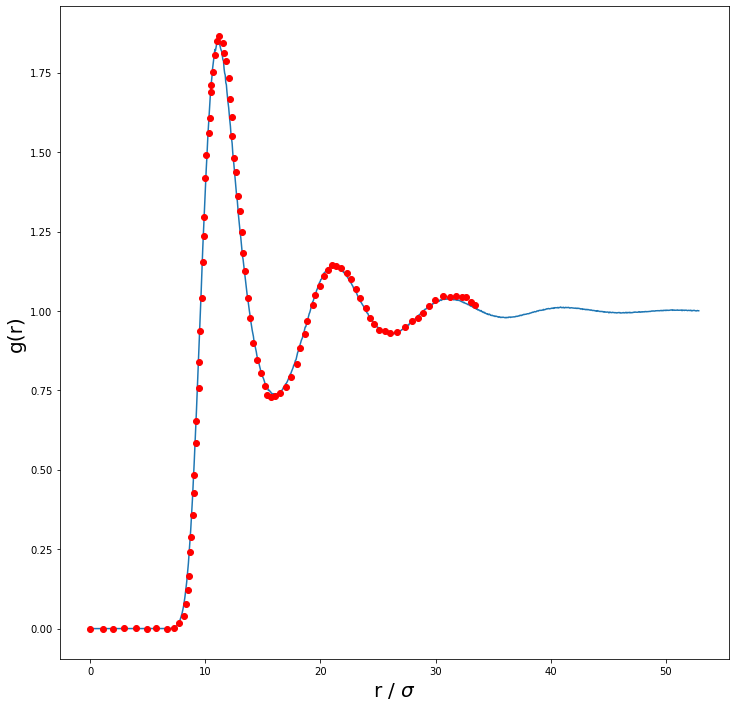

In [7]:
df = pd.read_csv("digit.csv", header=None)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(R, G)
ax.plot(df[0], df[1], "o",color = "red")
#ax.plot(np.linspace([0,nStep], [vTraza.mean(), vTraza.mean()])

#ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_ylim(1.5, 1.9) 
#ax.set_xlim(9, 13) 
fig.savefig('T4_GDR_comparación_1000_Gaylor', dpi=fig.dpi, facecolor="white")

plt.show()

Comparando los resultados de la función de la distribución radial con el potencial de Yukawa repulsivo de Van Megen con $K=556$, $\kappa = 0.149$

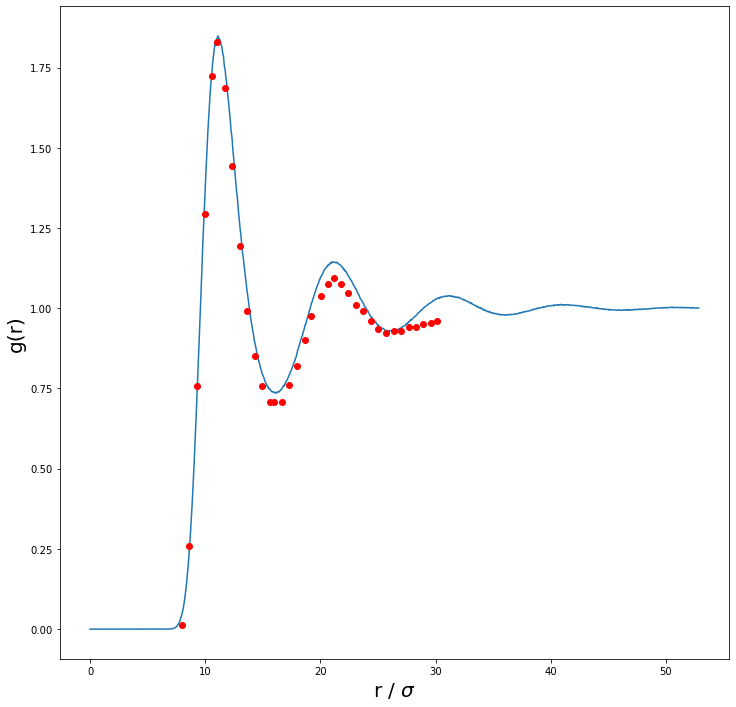

In [8]:
df2 = pd.read_csv("digit2.csv", header=None)

fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,12)

ax.plot(R, G)
ax.plot(df2[0], df2[1], "o",color = "red")
#ax.plot(np.linspace([0,nStep], [vTraza.mean(), vTraza.mean()])
#ax.plot([rt.min(), rt.max()],[1,1])
#ax.set_title("Variación de la energía potencial total \n en las diferentes configuraciones \n n*=" + str(n) +"\n N="+str(N)+" \n L="+str(L), size=20)
ax.set_ylabel("g(r)", size=20)
ax.set_xlabel("r / $\sigma$", size=20)
#ax.set_xlim(6, 10) 

fig.savefig('T4_GDR_comparación_1000_VanMegen', dpi=fig.dpi, facecolor="white")

plt.show()

Los resultados obtenidos por el programa muestran concordancia con los resultados expuestos por Gaylor y Van Megen. 

In [23]:
pote(R.values, G.values, n)

ICONTACTO =  1058 , GDR DE CONTACTO =  [1.00063784]
rho =  0.0008403380995252073 , Phs =  [0.00260146]
